In [38]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

class Trip:
    
    def __init__(self, trip_id, duration, distance, idle, irr_coef):
        self.id = trip_id
        self.duration = duration
        self.distance = distance
        self.idle = idle
        self.irr_coef = irr_coef
        
    @property
    def aver_velocity(self):
        return 0.0 if self.duration == 0 else 3600.0 * self.distance / self.duration
    
    @property
    def pure_velocity(self):
        return 0.0 if self.duration == 0 or self.duration == self.idle \
                   else 3600.0 * self.distance / (self.duration - self.idle)

In [2]:
trips = []

with open('data/trips_clean_all.txt', 'r') as csvfile:
    trips_reader = csv.reader(csvfile, delimiter='\t', quotechar='.')
    for data in trips_reader:
        trips.append(Trip(int(data[0]), float(data[1]),
                          float(data[2]), float(data[3]), float(data[4])))

In [3]:
len(trips)

27927

156.37300819994988 593.8325095748145
0.3666997858712165 0.1559836021635606 1004


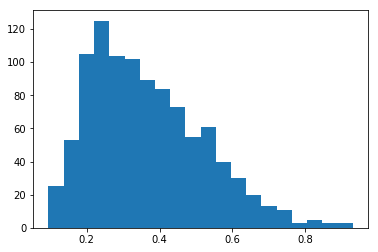

In [56]:
idles_mean = np.array([1.0 * trip.idle for trip in trips]).mean()
idles_std = np.array([1.0 * trip.idle for trip in trips]).std()
print idles_mean, idles_std

idles = np.array([1.0 * trip.idle / trip.duration for trip in trips
                  if trip.idle > idles_mean + idles_std and trip.idle < 15000])

print idles.mean(), idles.std(), len(idles)
plt.hist(idles, bins=20)
plt.show()

10.698129396028326


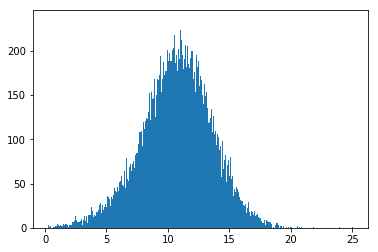

In [19]:
vs = np.array([trip.aver_velocity for trip in trips])

print vs.mean()
plt.hist(vs, bins=500)
plt.show()

83.02504710576542
1371


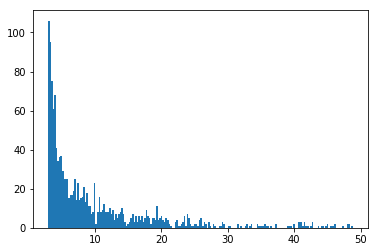

In [66]:
# unevenness of the travel distance
irrs = np.array([trip.irr_coef for trip in trips])
irr_mean = irrs.mean()
print irr_mean

irrs_low = np.array([trip.irr_coef for trip in trips
                     if trip.irr_coef > 3 and trip.irr_coef < 50])
print len(irrs_low)

plt.hist(irrs_low, bins=200)
plt.show()

In [72]:
# Atrakcje:
attr_titles = ['Barbakan',
               'Bazylika Bozego Ciala',
               'Bazylika Mariacka',
               'Bazylika sw. Floriana',
               'Bazylika sw. Michala Archaniola i sw. Stanislawa Biskupa']
file_titles = ['attr/barbakan.txt', 
               'attr/bbc.txt', 
               'attr/bm.txt',
               'attr/bf.txt',
               'attr/bmasb.txt']
trip_attr_indices = []

for fname in file_titles:
    with open(fname, 'r') as csvfile:
        trip_indices = []
        indices_reader = csv.reader(csvfile)
        for data in indices_reader:
            trip_indices.append(int(data[0]))
        trip_attr_indices.append(trip_indices)   

In [77]:
attr_trips = []
for trip_indices in trip_attr_indices:
    given_attr_trips = []
    for trip_idx in trip_indices:
        for trip in trips:
            if trip_idx == trip.id:
                given_attr_trips.append(trip)
    attr_trips.append(given_attr_trips)

In [88]:
# Select recreational trips
recr_trips = []
for given_attr_trips in attr_trips:
    given_recr_trips = []
    for trip in given_attr_trips:
        if trip.irr_coef > 2:
            given_recr_trips.append(trip)
    recr_trips.append(given_recr_trips)

8.500801420234643 263


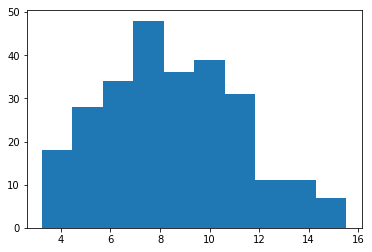

7.8588495381558525 157


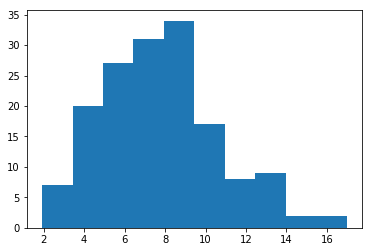

7.666186409891677 152


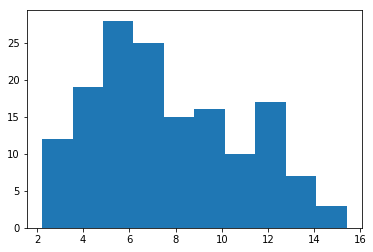

8.56575614546767 105


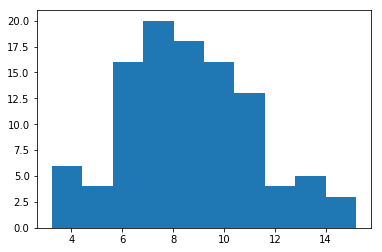

8.75783495369567 110


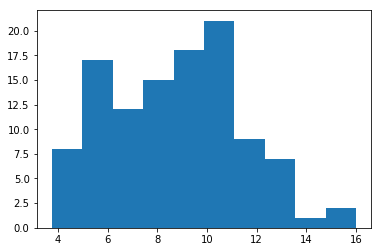

In [89]:
# Velocity distributions
for given_attr_trips in recr_trips:
    vs = np.array([trip.aver_velocity for trip in given_attr_trips])
    print vs.mean(), len(vs)
    plt.hist(vs)
    plt.show()